In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

# Retail supply chain

In [2]:
df = pd.read_csv("toothpaste.csv")

In [4]:
df.shape

(1000, 1)

In [5]:
df.head()

,sales
0,1274
1,1210
2,1036
3,966
4,1500


In [7]:
df.describe()

,sales
count,1000.000000
mean,1006.336000
std,199.152557
min,416.000000
25%,883.000000
50%,1008.000000
75%,1127.250000
max,1715.000000


array([[<AxesSubplot:title={'center':'sales'}>]], dtype=object)

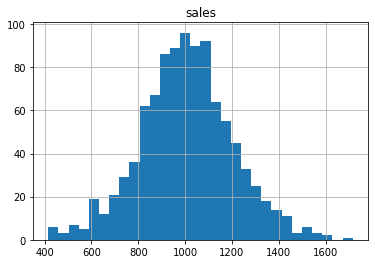

In [8]:
df.hist(bins=30)

Suppose the store has **beginning on-hand (BOH)** inventory of 1300. If the demand is more than the BOH, there is a need for stock **replenishment**. 

What is the prob of needing this replenishment?

In [10]:
1 - norm.cdf(1.5)

0.06680720126885809

Suppose there are 2000 stores, each with BOH of 1300. The **distribution center (DC)** needs to calculate the number of stores which might need replenishment. 

Expected number or stores: 120 out of 2000

In [20]:
2000*(1 - norm.cdf((1400-1000)/200))

45.50026389635842

# Coin from dice

In [21]:
def dice():
    return np.random.choice([1, 2, 3, 4, 5, 6])

In [31]:
dice()

1

In [32]:
def coin_from_dice():
    toss = dice()
    if toss <= 3:
        return "H"
    else:
        return "T"

In [43]:
coin_from_dice()

'H'

# Dice from coin

In [44]:
def coin(size):
    return np.random.choice(["H", "T"], size)

In [54]:
coin(3)

array(['H', 'T', 'H'], dtype='<U1')

In [55]:
coin_to_dice_map = {
    "HHH": 1,
    "HHT": 2,
    "HTH": 3,
    "HTT": 4,
    "THH": 5,
    "THT": 6,
}

In [56]:
def dice_from_coin():
    toss = coin(3)
    toss = "".join(toss)
    while toss in ["TTH", "TTT"]:
        toss = coin(3)
        toss = "".join(toss)
    return coin_to_dice_map[toss]

In [58]:
dice_tosses = [dice_from_coin() for i in range(6000)]

In [59]:
pd.value_counts(dice_tosses)

3    1025
5    1006
6    1005
1     999
4     992
2     973
dtype: int64

# Fair coin from biased

In [60]:
def biased_coin():
    return np.random.choice(["H", "T"], p=[0.8, 0.2])

In [67]:
biased_coin_tosses = [biased_coin() for i in range(1000)]

In [68]:
pd.value_counts(biased_coin_tosses)

H    795
T    205
dtype: int64

In [69]:
def fair_coin():
    t1 = biased_coin()
    t2 = biased_coin()
    while t1 == t2:
        t1 = biased_coin()
        t2 = biased_coin()
    return t1

In [70]:
fair_coin_tosses = [fair_coin() for i in range(1000)]

In [71]:
pd.value_counts(fair_coin_tosses)

H    503
T    497
dtype: int64